### Task #1: Understand the Problem Statement and Business Case
#### Business Case:
- Diabetic Retinopathy is a disease that results from complications of type 1 & 2 diabetes and affects patient eyes.
- The disease can develop if blood sugar levels are left uncontrolled for a prolonged period of time,
- It is caused by the damage of blood vessels in the retina which is located in the back of patient's eyes (retina is light sensitive tissue in the eye).
- Diabetic Retinopathy is the leading cause of blindness in the working-age population of the developed world.
- The World Health Organization estimates that 347 million people have the disease worldwide.
- With the power of Artificial Intelligence and Deep Learning, doctors will be able to detect blindness before it occurs. Aravind Eye Hospital in India hopes to detect and prevent diabetic Retinopathy among people mostly living in rural areas where medical screening and experienced doctors are limited.

|    NO DR | MILD | MODERATE | SEVERE | PROLIFERATE    |
|-----|-----|-----|-----|-----|
|  ![](train/No_DR/0a4e1a29ffff.png)   |  ![](train/Mild/0a61bddab956.png)   | ![](train/Moderate/0a9ec1e99ce4.png)    |  ![](train/Severe/0c917c372572.png)   |  ![](train/Proliferate_DR/0ada12c0e78f.png)   |

#### Inputs and Outputs
- The dataset consists of 3553 color images belongs to 5 categoriess
- Categories that are present in the data are No_DR, Mild, Moderate, Severe and Proliferative (radpily growing)

![](images/Task1-1.png)



### Task #2: Import Libraries and Datasets

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [3]:
os.listdir('./train')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [4]:
# Get the list of all files and directories in specific directory
os.listdir(os.path.join('train', 'Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [5]:
#check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case class name
for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train',i))
    for j in train_class:
        img = os.path.join('train',i,j)
        train.append(img)
        label.append(i)

print ('Number of train images = {}'.format(len(train)))


Number of train images = 3662


In [6]:
#Remove '.DS_Store' file if error encountered
#!cd train find . -name '.DS_Store' -type f -delete

In [7]:
train

['train\\Mild\\0024cdab0c1e.png',
 'train\\Mild\\00cb6555d108.png',
 'train\\Mild\\0124dffecf29.png',
 'train\\Mild\\01b3aed3ed4c.png',
 'train\\Mild\\0369f3efe69b.png',
 'train\\Mild\\03e25101e8e8.png',
 'train\\Mild\\04ac765f91a1.png',
 'train\\Mild\\059bc89df7f4.png',
 'train\\Mild\\05a5183c92d0.png',
 'train\\Mild\\0684311afdfc.png',
 'train\\Mild\\06b71823f9cd.png',
 'train\\Mild\\07929d32b5b3.png',
 'train\\Mild\\07a1c7073982.png',
 'train\\Mild\\086d41d17da8.png',
 'train\\Mild\\09935d72892b.png',
 'train\\Mild\\0a3202889f4d.png',
 'train\\Mild\\0a61bddab956.png',
 'train\\Mild\\0ad7f631dedb.png',
 'train\\Mild\\0d310aba6373.png',
 'train\\Mild\\0dc031c94225.png',
 'train\\Mild\\0dce95217626.png',
 'train\\Mild\\0eb52045349f.png',
 'train\\Mild\\0f495d87656a.png',
 'train\\Mild\\0fb1053285cf.png',
 'train\\Mild\\101b9ebfc720.png',
 'train\\Mild\\107aea0d9289.png',
 'train\\Mild\\10f36b0239fb.png',
 'train\\Mild\\1116271db4ea.png',
 'train\\Mild\\111898ab463d.png',
 'train\\Mild\

In [8]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

C:\Users\zacha\Anaconda3\envs\zach37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

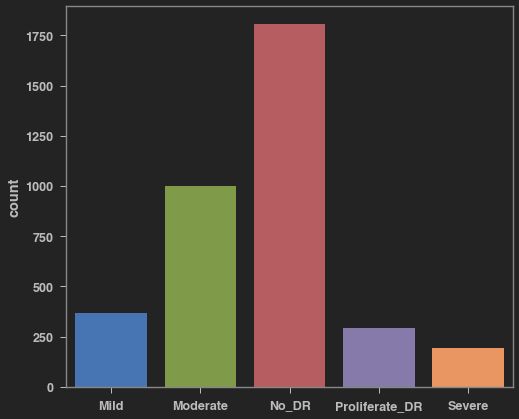

In [9]:
#Count plot for all classes
sns.countplot(label)


### Task #3: Perform Data Exploration and Visualization

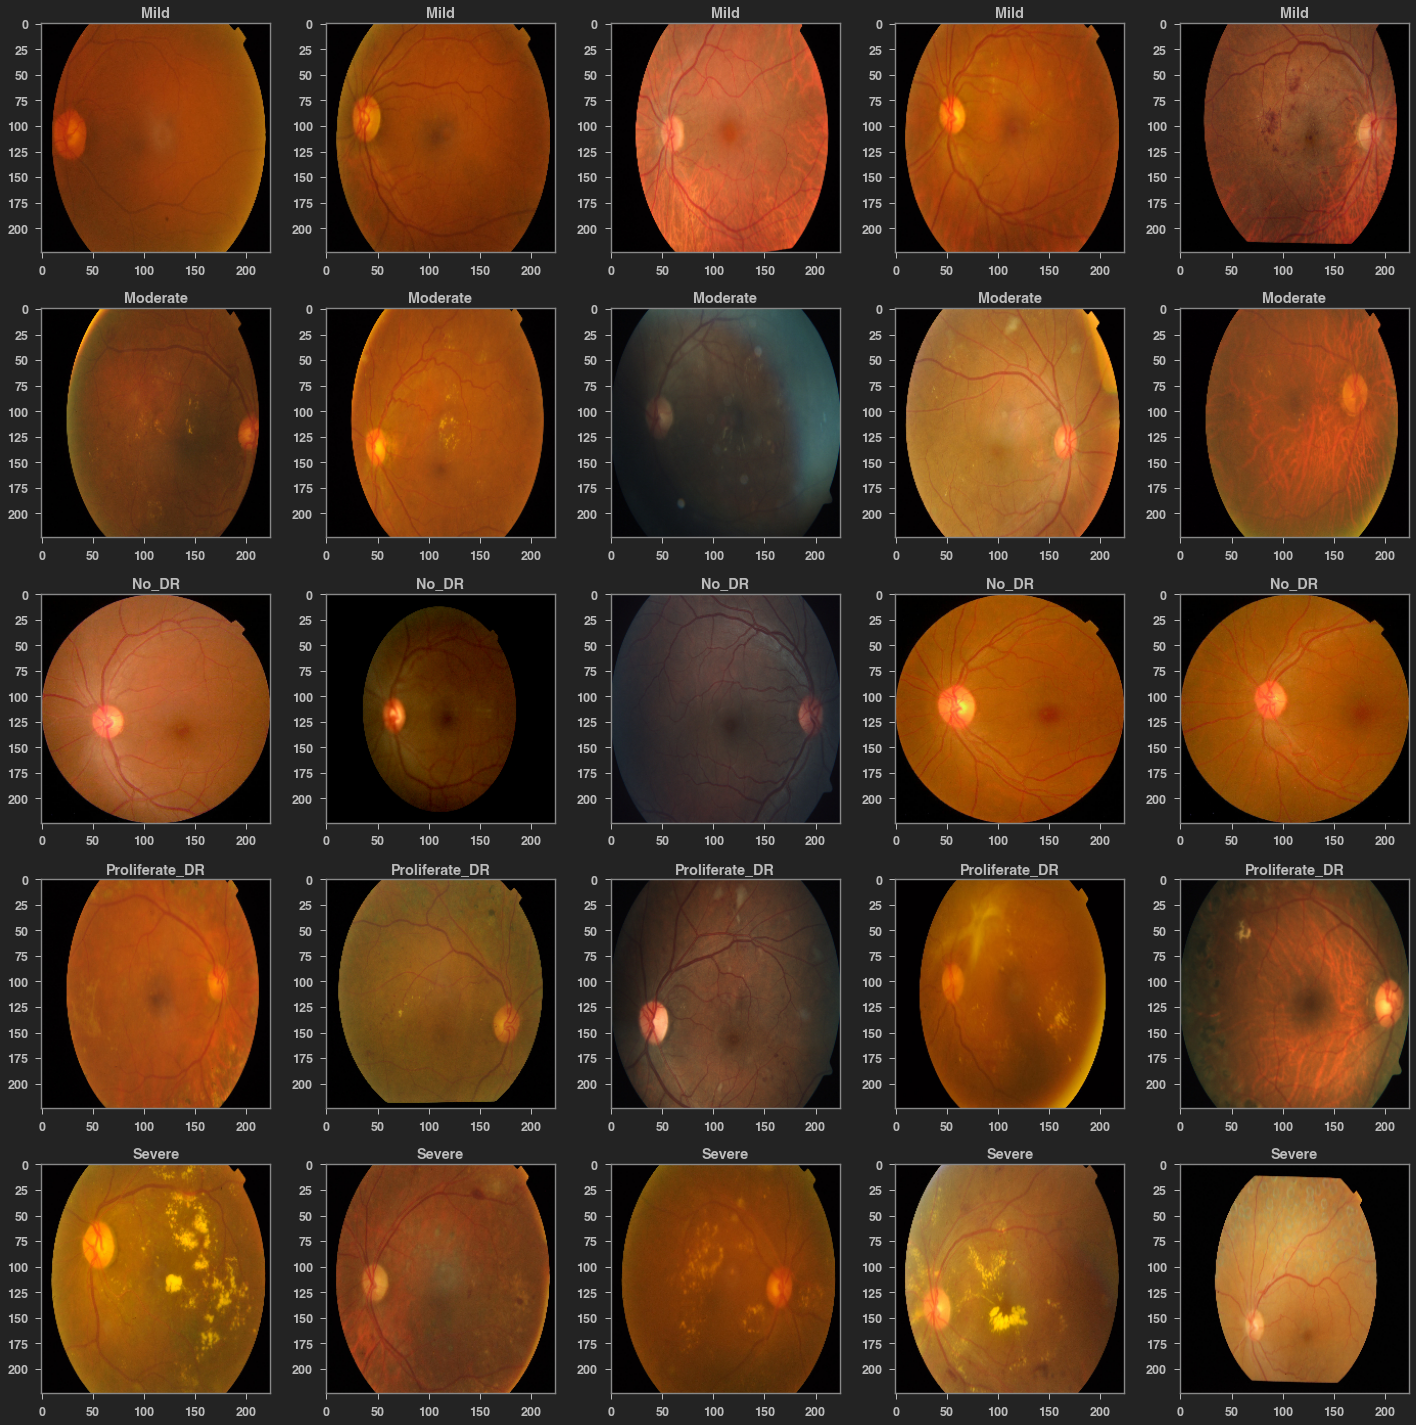

In [10]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('train', i)) #train class
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j]) #Train/trainclass/imagenames
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)
  count += 1

fig.tight_layout()


In [11]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []

for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [12]:
# create retina_df dataframe contains 2 columns Image (paths) and Label
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

,Image,Labels
0,train\Mild\0024cdab0c1e.png,Mild
1,train\Mild\00cb6555d108.png,Mild
2,train\Mild\0124dffecf29.png,Mild
3,train\Mild\01b3aed3ed4c.png,Mild
4,train\Mild\0369f3efe69b.png,Mild
...,...,...
3657,train\Severe\f9156aeffc5e.png,Severe
3658,train\Severe\fb61230b99dd.png,Severe
3659,train\Severe\fcc6aa6755e6.png,Severe
3660,train\Severe\fda39982a810.png,Severe


<function matplotlib.pyplot.show(close=None, block=None)>

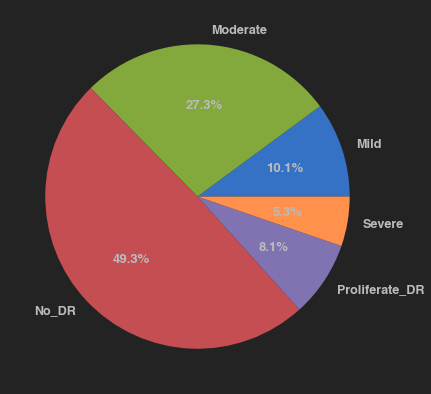

In [17]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels=Class_name, autopct='%1.1f%%')
plt.show


### Task #4: Perform Data Augmentation and Create Data Generator

In [19]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2,random_state=68)

In [21]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
# It's all about generalizing data not to memorizing the data
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15) #use cross validation for avoid overfitting

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.



### Task #5: Understand the Theory and Intuition Behind Convolutional Neural Networks

### Task #6: Build a ResNet Deep Neural Network Model

### Task #7: Compile and Train the Deep Neural Network Model

### Task #8: Assess the Performance of the Trained Model